In [1]:
import requests
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [2]:
###Prepare data frame
http_request = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv')
http_text = http_request.text.split("\n")
data_array = []
for lines in http_text:
    data_array.append(lines.split(";"))
col_names = []
for col in data_array[0]:
    col_names.append(col.strip('"'))
    
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
##Change to numeric
data_frame = pd.DataFrame(data=data_array[1:]).apply(pd.to_numeric)
## Remove last column as all are Nan
data_frame = data_frame.ix[0:data_frame.shape[0]-2,:]
##Remove nan with mean values
data_frame = pd.DataFrame(fill_NaN.fit_transform(data_frame),columns=col_names)
data_frame.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6.0


In [3]:
feature_cols = col_names[:-1]
features = data_frame[feature_cols]
labels = data_frame["quality"]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)
actuals = labels_test[:].values

In [27]:
##SVM
from sklearn import svm
scaler_model = MinMaxScaler().fit_transform(features_train.values)
bins = np.linspace(0, 1, 10)
digitized = np.digitize(scaler_model, bins)
print(digitized)
clf = svm.SVC()
clf.fit(X=digitized,y=labels_train.values)  
score_knn = cross_val_score(clf, digitized, labels_train.values, cv=4)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

predictions = clf.predict(features_test)
for i in range (labels_test.size-1) :
    if predictions[i] != actuals[i]:
        print("Predicted value " +  str(predictions[i]) + "and actual value is " + str(actuals[i]))  

SyntaxError: unexpected EOF while parsing (<ipython-input-27-70f8f320fdda>, line 15)

[('fixed acidity', -0.12352578913237661)]
Mean squared error: 0.88
Variance score: 0.01
[[ 6.]]


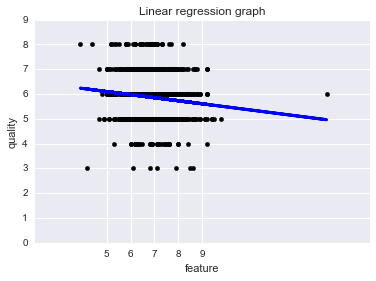

In [81]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(features_train, labels_train)

coefs = list(zip(feature_cols, linreg.coef_))
print(coefs)

labels_predicted = linreg.predict(features_test)

# ist(zip
print("Mean squared error: %.2f"
    11  % np.sqrt(mean_squared_error(labels_test, labels_predicted)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(labels_test, labels_predicted))
print(features_test[:1].values)
# Plot outputs
#for i in range(len(feature_cols)):
plt.scatter(features_test, labels_test,  color='black')
plt.plot(features_test, labels_predicted, color='blue', linewidth=3)
plt.xticks(range(5,10))
plt.yticks(range(10))
plt.xlabel('feature')
plt.ylabel('quality')
plt.title('Linear regression graph')
plt.grid(True)
plt.show()

Intercepts are [-13.06609569  -5.95430694  -1.9894609    0.22400334   0.06808869
  -1.77119271 -11.08037296]
[('fixed acidity', array([ 1.01509739]))]
[(array([ 6.]), 6.0), (array([ 5.4]), 6.0), (array([ 7.1]), 6.0), (array([ 7.3]), 6.0), (array([ 6.5]), 6.0), (array([ 6.3]), 6.0), (array([ 7.]), 6.0), (array([ 7.6]), 6.0), (array([ 8.3]), 6.0), (array([ 8.7]), 6.0), (array([ 6.4]), 6.0), (array([ 6.7]), 6.0), (array([ 6.3]), 6.0), (array([ 7.6]), 6.0), (array([ 5.9]), 6.0), (array([ 6.4]), 6.0), (array([ 5.2]), 6.0), (array([ 5.5]), 6.0), (array([ 7.7]), 6.0), (array([ 6.7]), 6.0), (array([ 5.9]), 6.0), (array([ 7.4]), 6.0), (array([ 6.9]), 6.0), (array([ 7.6]), 6.0), (array([ 5.9]), 6.0), (array([ 7.6]), 6.0), (array([ 6.8]), 6.0), (array([ 5.1]), 6.0), (array([ 8.7]), 6.0), (array([ 8.1]), 6.0), (array([ 6.8]), 6.0), (array([ 7.4]), 6.0), (array([ 7.1]), 6.0), (array([ 7.2]), 6.0), (array([ 7.4]), 6.0), (array([ 6.1]), 6.0), (array([ 7.1]), 6.0), (array([ 6.6]), 6.0), (array([ 7.6])

TypeError: Dimensions of C (1225, 2) are incompatible with X (1) and/or Y (1225); see help(pcolormesh)

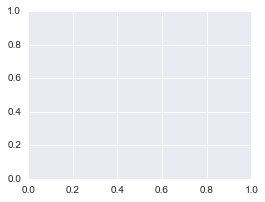

In [26]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

feature_cols = col_names[:1]
features = data_frame[feature_cols]
labels = data_frame["quality"]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)
actuals = labels_test[:].values

logreg = LogisticRegression(C=1e42) # Set Large C value for low regularization
logreg.fit(features_train, labels_train)

print("Intercepts are "+str(logreg.intercept_))

coefs = list(zip(feature_cols, logreg.coef_))
print(coefs)

labels_predicted = logreg.predict(features_test) # Categorial / Digital
predicted_proba = logreg.predict_proba(features_test) # Analog (e.g. > 0.5 = true else false)

plt.figure(1, figsize=(4, 3))
C = list(zip(features_test.values, labels_predicted))
print(C)

plt.pcolormesh(features_test, labels_test, C, cmap=plt.cm.Paired)
plt.scatter(features_test, labels_test,c=C, edgecolors='k', cmap=plt.cm.Paired)
#plt.plot(features_test, labels_predicted, color='blue', linewidth=3)
plt.xticks(range(5,10))
plt.yticks(range(10))
plt.xlabel(feature_cols)
plt.ylabel('quality')
plt.title('Logistic regression graph')
plt.grid(True)
plt.show()

#for i in range (labels_test.size-1) :
 #   if predictions[i] != actuals[i]:
  #      print("Predicted value " +  str(predictions[i]) + "and actual value is " + str(actuals[i]))  






In [39]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

random_forest = RandomForestClassifier(criterion="entropy", max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
#random_forest = RandomForestClassifier(criterion="gini", max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
random_forest = random_forest.fit(features_train, labels_train)

print(random_forest.feature_importances_)

print(random_forest.score(features_train, labels_train))

predicted_proba = random_forest.predict_proba(features_test)
# Get success rate of the model
print(roc_auc_score(labels_test, predicted_proba)) # [:,1] for only 2 classes (e.g. Churn, Not Churn)

[ 0.07202589  0.11345824  0.07007856  0.07960145  0.08561998  0.0964986
  0.08236588  0.10712978  0.07353311  0.06761671  0.15207182]
0.867138578818


ValueError: multiclass format is not supported

In [41]:
# kNN : k - Near Neighbors (Classification)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn = knn.fit(features_train, labels_train)

print(knn.score(features_train, labels_train))

predicted_proba = knn.predict_proba(features_test)
# Get success rate of the model
print(roc_auc_score(labels_test, predicted_proba[:])) # [:,1] for only 2 classes (e.g. Legitimate or Malicious site)

1.0


ValueError: multiclass format is not supported

In [42]:
# Naive Bayes (Classification, strong independence between features)

# Feature Extraction - http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#TFIDF Vectorizer
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)
features = vectorizer.fit_transform(dataframe.text) # transform sentence text from 1 column to features


from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

#clf = naive_bayes.BernoulliNB() #discrete data, for binary/boolean features
#clf = naive_bayes.GaussianNB() # ?
clf = naive_bayes.MultinomialNB() #discrete data, for occurrence count
clf.fit(features_train, labels_train)

predicted_proba = clf.predict_proba(features_test)
# Get success rate of the model
print(roc_auc_score(labels_test, predicted_proba[:,1])) # [:,1] for only 2 classes (e.g. Spam or Ham)

LookupError: 
**********************************************************************
  Resource 'corpora/stopwords' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\User\\Anaconda3\\nltk_data'
    - 'C:\\Users\\User\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
**********************************************************************

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label.values, clf.predict(X=digitized))

array([[   2,    0,    6,   12,    0,    0,    0],
       [   0,   11,   89,   61,    2,    0,    0],
       [   0,    0,  869,  582,    6,    0,    0],
       [   0,    1,  316, 1785,   95,    0,    0],
       [   0,    0,   36,  579,  264,    0,    0],
       [   0,    0,    7,  120,   48,    0,    0],
       [   0,    0,    0,    2,    3,    0,    0]])

NameError: name 'itertools' is not defined

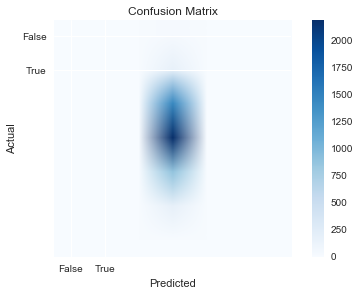

In [45]:
# Confusion Matrix

from sklearn import metrics

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(df_confusion, cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.yticks(np.arange(2), ('False', 'True'))
    plt.xticks(np.arange(2), ('False', 'True'))
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    thresh = df_confusion.max() / 2
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        plt.text(j, i, df_confusion[i, j],
                 horizontalalignment="center",
                 color="white" if df_confusion[i, j] > thresh else "black")


labels_pred = clf.predict(features)
df_confusion = metrics.confusion_matrix(labels, labels_pred)
#df_confusion
plot_confusion_matrix(df_confusion)